# <center> UCS2612 Machine Learning Laboratory </center>

# <center><h3> A9. Applications of dimensionality reduction techniques</h3> </center>

# Sai Rahul
# 3122 21 5001 090
# CSE-B

# Description

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more
details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009]. Due to privacy and
logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is
no data about grape types, wine brand, wine selling price, etc.). These datasets can be viewed as
classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more
normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few
excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to
test feature selection methods.
The data can be used to test (ordinal) regression or classification (in effect, this is a multi-class
task, where the clases are ordered) methods. Other research issues are feature selection and
outlier detection. The data includes two datasets:

- winequality-red.csv - red wine preference samples;
- winequality-white.csv - white wine preference samples;


# Aim

Develop a python program to perform dimensionality reduction using PCA and LDA. Visualize the
features from the dataset and interpret the results obtained by the model using Matplotlib library. 


Dataset:- http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip



# Import libraries

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np  
import matplotlib.pyplot as plt  

# Load dataset

In [145]:
# importing or loading the dataset
data1 = pd.read_csv('C:/Users/ashwi/Downloads/ML Lab/A9/winequality/winequality-white.csv', sep=";")

In [146]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [147]:
data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Data pre-processing

In [148]:
data1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [149]:
data1.dropna(inplace=True)

In [150]:
scaler_standard = StandardScaler()
data1_standardized = scaler_standard.fit_transform(data1)

In [151]:
scaler_normal = MinMaxScaler()
data1_normalized = scaler_normal.fit_transform(data1)

In [152]:
data1_standardized = pd.DataFrame(data1_standardized, columns=data1.columns)
data1_normalized = pd.DataFrame(data1_normalized, columns=data1.columns)

In [153]:
data1_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [154]:
data1_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


# EDA

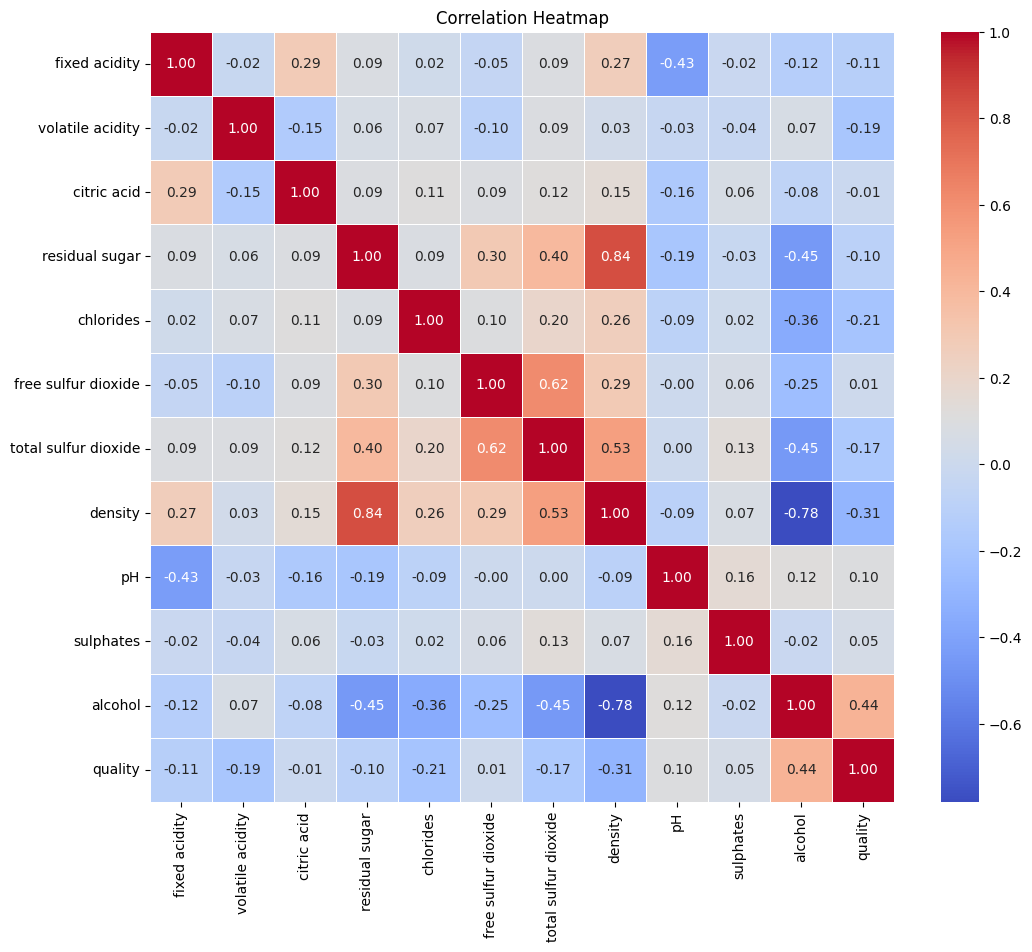

In [155]:
plt.figure(figsize=(12, 10))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Splitting the data into Testing and training 

In [156]:
X_white = data1.iloc[:, 0:11].values
y_white = data1.iloc[:, 11].values

In [157]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white,y_white, test_size=0.2, random_state=0)

# Feature selection and preprocessing

In [158]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train_white = sc.fit_transform(X_train_white)
X_test_white = sc.transform(X_test_white)

# Model building(PCA)

In [172]:
from sklearn.decomposition import PCA  
   
PCa = PCA (n_components = 2)  
   
X_train_white = PCa.fit_transform(X_train_white)  
X_test_white = PCa.transform(X_test_white)  
   
explained_variance = PCa.explained_variance_ratio_

In [174]:
from sklearn.linear_model import LogisticRegression  
classifier_1 = LogisticRegression(random_state = 0)  
classifier_1.fit(X_train_white, y_train_white)  

LogisticRegression(random_state=0)

In [175]:
y_pred_white = classifier_1.predict(X_test_white) 

In [202]:
from sklearn.metrics import confusion_matrix as CM  
c_m_white = CM(y_test_white, y_pred_white)
print(c_m_white)
accuracy_score(y_test_white,y_pred_white)  

[[  0   0   2   7   0   0]
 [  0   0  10  38   3   0]
 [  0   0  77 216   2   0]
 [  0   0  67 338   4   0]
 [  0   0  16 161   6   0]
 [  0   0   1  32   0   0]]


0.42959183673469387

In [163]:
print("Accuracy score of PCA model is " , accuracy_score(y_test_white,y_pred_white))

Accuracy score of PCA model is  0.42959183673469387


# Result of PCA

In [ ]:
# result through scatter plot 
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train_white, y_train_white 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier_1.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

In [ ]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test_white, y_test_white
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier_1.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()

# Model building(LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_red = lda.fit_transform(X_train_white, y_train_white)
X_test_red = lda.transform(X_test_white)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_white, y_train_white)

In [ ]:
y_pred_white = classifier_1.predict(X_test_white)
print(y_pred_white)

In [171]:
accuracy = accuracy_score(y_test_white, y_pred_white)
print("Accuracy of LDA model:", accuracy)


Accuracy of LDA model: 0.42959183673469387


# Result of LDA

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_white, y_test_white

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_white, y_train_white

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Inferences

1. After applying PCA, you can analyze the principal components to understand which original features contribute the most to the variance in the data. You can also visualize the data in reduced dimensions to explore patterns or clusters.

2. After applying LDA, you can interpret the learned linear discriminants to understand how the classes are separated in the reduced-dimensional space. LDA provides insight into which features are most discriminative for class separation.

# Learning Outcomes

1. Implementation of Pre-processing, EDA and feature selection.
2. Implementation of PCA nad LDA models and visualising it.
3. Displaying the confusion matrix.
4. Understanding the techniques of dimentionality reduction.